In [54]:
from main import *

parameters = load_parameters('parameters.yaml')
waypoints = [
        {'x': 0.0, 'y': 0.0, 'z': 70.0, 'v': 5}, 
        {'x': 50.0, 'y': 0.0, 'z': 60.0, 'v': 5},
        {'x': 70.0, 'y': 20.0, 'z': 60.0, 'v': 5},
        {'x': 10.0, 'y': 80.0, 'z': 10.0, 'v': 5},

    ]
init_state = create_initial_state(x=0, y=0, z=0)
# Start position for plotting
start_position = init_state['pos'].copy()

# Get maximum thrust from the rotor model
thrust_max = get_max_thrust_from_rotor_model(parameters)

# PID controller settings (yaw remain fixed)
pid_gains = load_pid_gains(parameters)

# Initialize the world
world = World.load_world(parameters['world_data_path'])

In [55]:
def exec_sim(pid_gains):
    quad_controller = create_quadcopter_controller(init_state, pid_gains, thrust_max, parameters)
    drone = create_quadcopter_model(init_state, quad_controller, parameters)
    sim = create_simulation(drone, world, waypoints, parameters, noise_model=None)
    sim.startSimulation(stop_at_target=False, use_static_target=True, verbose=True)
    return sim


In [93]:
# GOOD VALUES
                            # around 0.7, 0, from 0 to 0.01, from 0 to 2
# parameters['k_pid_alt'] = [0.7, 0, 0.1]
                            # from 150 to 2000, from 0 to 30, from 0 to 10
# parameters['k_pid_vsp'] = [150, 10, 1]
                            # around 0.7, from 0 to 0.1, from 0.08 to 0.5
# parameters['k_pid_pos'] = [0.7, 0.01, 0.09]
                            # from 1 to 70, from 0 to 1000, from 0.0001 to 5
# parameters['k_pid_att'] = [20, 1, 0.01]
                            # from 0.1 to 10, from 0 to 1, from 0.0001 to 0.1 
# parameters['k_pid_hsp'] = [1, 0.01, 0.01]


# Initialize the simulation
parameters['k_pid_pos'] = [0.7, 0.01, 0.1]
parameters['k_pid_att'] = [20, 1, 0.01]
parameters['k_pid_hsp'] = [1, 0.001, 0.01]
pid_gains = load_pid_gains(parameters)
sim1 = exec_sim(pid_gains)


parameters['k_pid_pos'] = [0.7, 0.01, 0.1]
parameters['k_pid_att'] = [20, 1, 0.01]
parameters['k_pid_hsp'] = [1, 0.01, 0.01]
pid_gains = load_pid_gains(parameters)
sim2 = exec_sim(pid_gains)

parameters['k_pid_pos'] = [0.7, 0.01, 0.1]
parameters['k_pid_att'] = [20, 1, 0.01]
parameters['k_pid_hsp'] = [1, 1, 0.01]
pid_gains = load_pid_gains(parameters)
sim3 = exec_sim(pid_gains)

parameters['k_pid_pos'] = [0.7, 0.01, 0.1]
parameters['k_pid_att'] = [20, 1, 0.01]
parameters['k_pid_hsp'] = [1, 5, 0.01]
pid_gains = load_pid_gains(parameters)
sim4 = exec_sim(pid_gains)

Simulation completed in 11.98 seconds.
Simulation completed in 12.72 seconds.
Simulation completed in 12.49 seconds.
Simulation completed in 12.26 seconds.


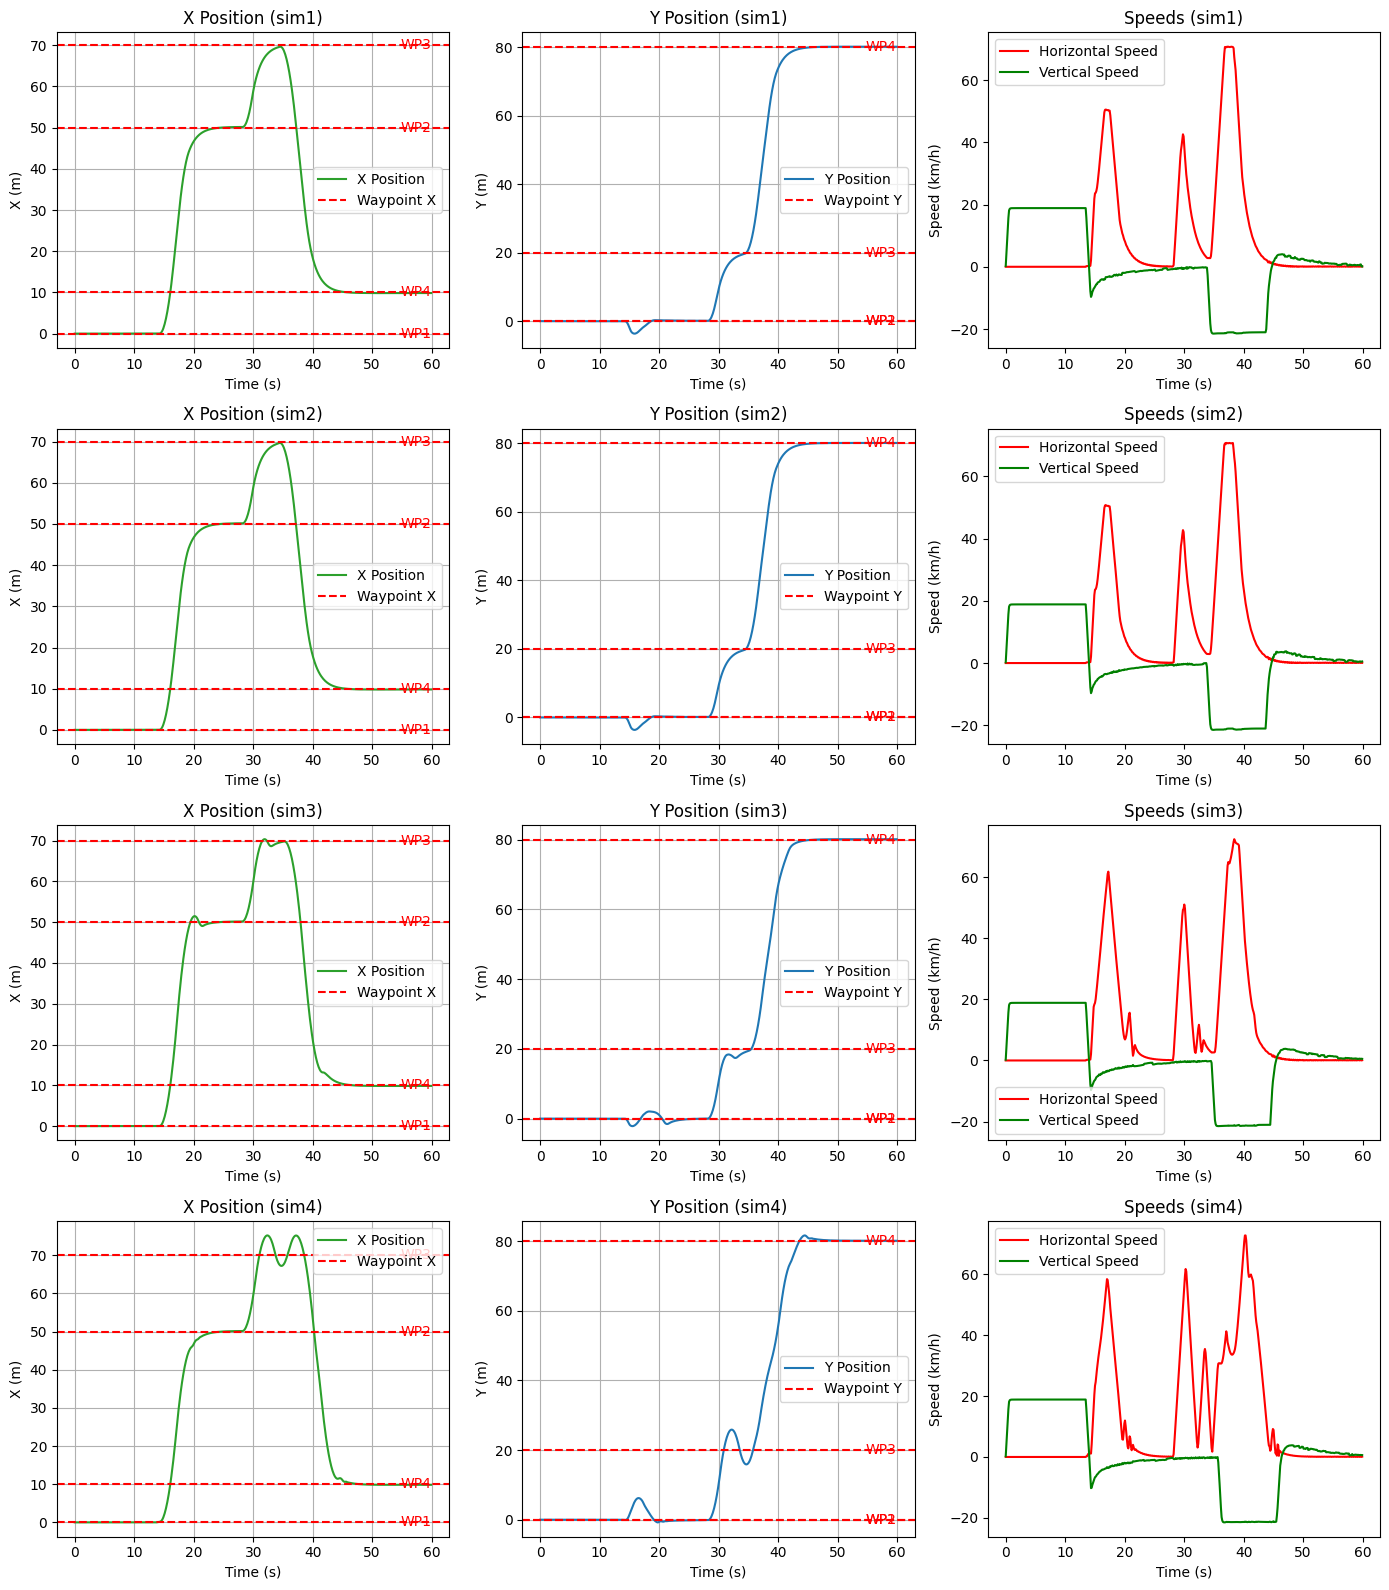

In [94]:
log_data = {
        'X Position (sim1)': {
            'data': np.array(sim1.positions)[:, 0],
            'ylabel': 'X (m)',
            'color': 'tab:green',
            'linestyle': '-',
            'label': 'X Position',
            'showgrid': True
        },
        'Y Position (sim1)': {
            'data': np.array(sim1.positions)[:, 1],
            'ylabel': 'Y (m)',
            'color': 'tab:blue',
            'linestyle': '-',
            'label': 'Y Position',
            'showgrid': True
        },
        'Speeds (sim1)': {
            'data': {
                'Horizontal Speed': np.array(sim1.horiz_speed_history) * 3.6,  # Convert m/s to km/h
                'Vertical Speed':   np.array(sim1.vertical_speed_history) * 3.6  # Convert m/s to km/h
            },
            'ylabel': 'Speed (km/h)',
            'styles': {
                'Horizontal Speed': {'color': 'r', 'linestyle': '-', 'label': 'Horizontal Speed'},
                'Vertical Speed':   {'color': 'g', 'linestyle': '-', 'label': 'Vertical Speed'}
            }
        },

        'X Position (sim2)': {
            'data': np.array(sim2.positions)[:, 0],
            'ylabel': 'X (m)',
            'color': 'tab:green',
            'linestyle': '-',
            'label': 'X Position',
            'showgrid': True
        },
        'Y Position (sim2)': {
            'data': np.array(sim2.positions)[:, 1],
            'ylabel': 'Y (m)',
            'color': 'tab:blue',
            'linestyle': '-',
            'label': 'Y Position',
            'showgrid': True
        },
        'Speeds (sim2)': {
            'data': {
                'Horizontal Speed': np.array(sim2.horiz_speed_history) * 3.6,  # Convert m/s to km/h
                'Vertical Speed':   np.array(sim2.vertical_speed_history) * 3.6  # Convert m/s to km/h
            },
            'ylabel': 'Speed (km/h)',
            'styles': {
                'Horizontal Speed': {'color': 'r', 'linestyle': '-', 'label': 'Horizontal Speed'},
                'Vertical Speed':   {'color': 'g', 'linestyle': '-', 'label': 'Vertical Speed'}
            }
        },

        'X Position (sim3)': {
            'data': np.array(sim3.positions)[:, 0],
            'ylabel': 'X (m)',
            'color': 'tab:green',
            'linestyle': '-',
            'label': 'X Position',
            'showgrid': True
        },
        'Y Position (sim3)': {
            'data': np.array(sim3.positions)[:, 1],
            'ylabel': 'Y (m)',
            'color': 'tab:blue',
            'linestyle': '-',
            'label': 'Y Position',
            'showgrid': True
        },

        'Speeds (sim3)': {
            'data': {
                'Horizontal Speed': np.array(sim3.horiz_speed_history) * 3.6,  # Convert m/s to km/h
                'Vertical Speed':   np.array(sim3.vertical_speed_history) * 3.6  # Convert m/s to km/h
            },
            'ylabel': 'Speed (km/h)',
            'styles': {
                'Horizontal Speed': {'color': 'r', 'linestyle': '-', 'label': 'Horizontal Speed'},
                'Vertical Speed':   {'color': 'g', 'linestyle': '-', 'label': 'Vertical Speed'}
            }
        },
        'X Position (sim4)': {
            'data': np.array(sim4.positions)[:, 0],
            'ylabel': 'X (m)',
            'color': 'tab:green',
            'linestyle': '-',
            'label': 'X Position',
            'showgrid': True
        },
        'Y Position (sim4)': {
            'data': np.array(sim4.positions)[:, 1],
            'ylabel': 'Y (m)',
            'color': 'tab:blue',
            'linestyle': '-',
            'label': 'Y Position',
            'showgrid': True
        },
        'Speeds (sim4)': {
            'data': {
                'Horizontal Speed': np.array(sim4.horiz_speed_history) * 3.6,  # Convert m/s to km/h
                'Vertical Speed':   np.array(sim4.vertical_speed_history) * 3.6  # Convert m/s to km/h
            },
            'ylabel': 'Speed (km/h)',
            'styles': {
                'Horizontal Speed': {'color': 'r', 'linestyle': '-', 'label': 'Horizontal Speed'},
                'Vertical Speed':   {'color': 'g', 'linestyle': '-', 'label': 'Vertical Speed'}
            }
        }

    }

plotLogData(
        log_data,
        time = np.array(sim1.time_history),
        waypoints = waypoints,
        ncols = 3,
    )